### Sekcja generowania danych historycznych

In [225]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import math

def errorify(value):
    error_factors = [0.01,0.1,10,100]
    error_value = value * rnd.choice(error_factors)
    return error_value

def error_price(price):
    return errorify(price)

def error_quantity(quantity):
    return errorify(quantity)

def gen_product(orders_no, price_init, price_end, order_qunat_rng, error_prob):
    price_curr = price_init
    price_increase = (price_end - price_init) / orders_no
    product_orders = []
    for i in range(orders_no):
        price = round(price_curr + (rnd.uniform(-3,3) * price_increase), 2)
        quantity = rnd.randrange(order_qunat_rng[0], order_qunat_rng[1])
        if rnd.random() < error_prob:
            if rnd.random() > 0.5:
                price = error_price(price)
            else:
                quantity = error_quantity(quantity)
        product_orders.append((price, quantity))
        price_curr += price_increase

    return product_orders

Przykładowe dane na podstawie treści zadania

[(99.63, 33), (99.8, 46), (101.66, 32), (102.05, 44), (102.27, 47), (101.39, 50), (101.7, 42), (102.48, 47), (104.1, 43), (104.39, 35), (103.4, 48), (105.26, 31), (105.1, 49), (106.28, 45), (105.96, 38), (106.61, 33), (107.33, 33), (107.74, 39), (107.3, 46), (1.0835, 31), (107.88, 30), (109.52, 37), (109.47, 47), (108.2, 44), (110.31, 38), (109.56, 35), (109.97, 40), (111.29, 37), (110.41, 33), (111.2, 46), (112.45, 30), (111.34, 37), (112.6, 34), (1136.8000000000002, 44), (113.54, 37), (1.1432, 39), (115.01, 33), (114.03, 50), (114.51, 50), (115.92, 33), (116.46, 30), (116.0, 37), (117.92, 32), (118.06, 0.47000000000000003), (118.12, 42), (1.1805, 40), (118.17, 50), (119.3, 50), (118.78, 43), (119.46, 34), (120.89, 33), (119.33, 3.6), (120.05, 41), (121.54, 36), (121.31, 39), (120.89, 47), (121.41, 32), (121.62, 43), (122.39, 49), (124.37, 48)]


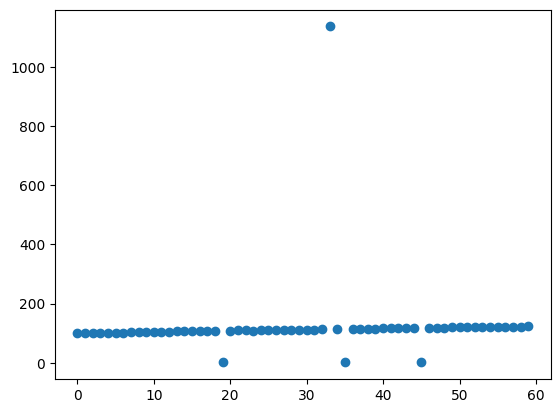

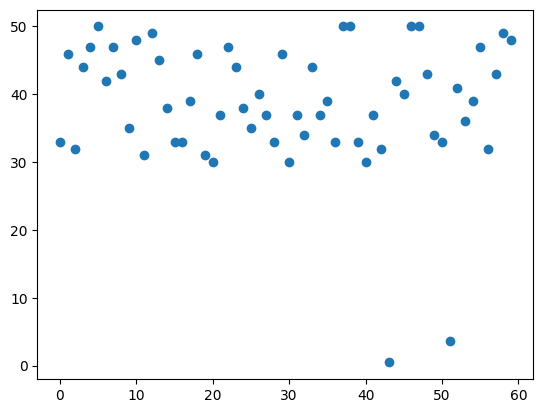

<Figure size 640x480 with 0 Axes>

In [226]:
product_sales = gen_product(60, 100, 124, (30,51), 0.1)
print(product_sales)
x = [x for x in range(60)]
y_price = [x[0] for x in product_sales]
y_quantity = [x[1] for x in product_sales]
plt.scatter(x, y_price)
plt.show()
plt.clf()
plt.scatter(x, y_quantity)
plt.show()
plt.clf()

### Zastosowanie regresji liniowej

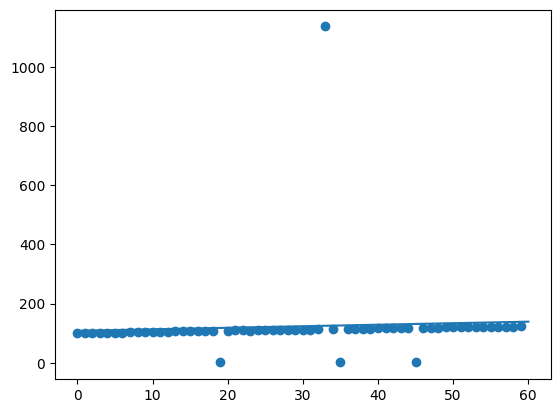

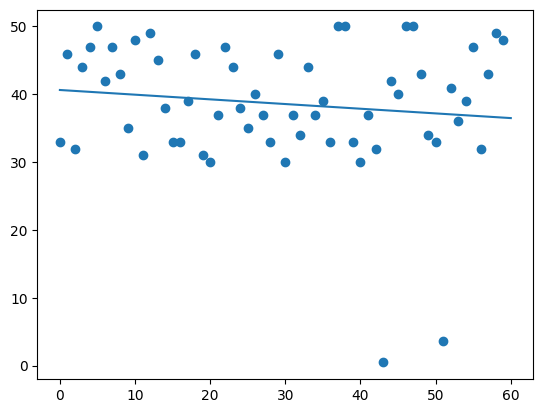

<Figure size 640x480 with 0 Axes>

In [227]:
def get_coeffs(x, y):
    x_np = np.array(x). reshape((-1,1))
    y_price = np.array(y)
    model_price = LinearRegression().fit(x_np, y_price)

    return (model_price.coef_[0], model_price.intercept_)

def print_with_approx(x, y, coeffs):
    n = len(x)
    plt.scatter(x, y)
    plt.plot([0,n], [coeffs[1], n * coeffs[0] + coeffs[1]])
    plt.show()
    plt.clf()

coeffs_p = get_coeffs(x, y_price)
coeffs_q = get_coeffs(x, y_quantity)
print_with_approx(x, y_price, coeffs_p)
print_with_approx(x, y_quantity, coeffs_q)

Remove outliers

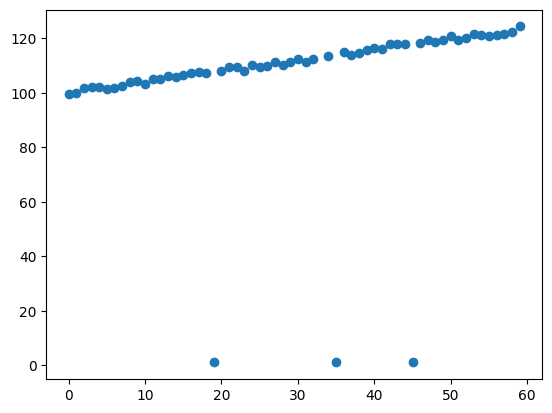

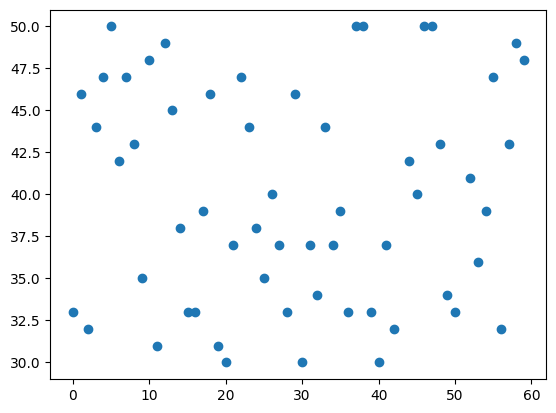

<Figure size 640x480 with 0 Axes>

In [228]:
def remove_outliers(x, y, coeffs):
    n = len(x)
    if n <= 2:
        return (x, y, 0)
    y_exp = [(x * coeffs[0] + coeffs[1]) for x in x]

    SSE = 0

    for i in range(n):
        SSE += (y[i] - y_exp[i])**2

    s = math.sqrt(SSE/(n-2))
    x_good = []
    y_good = []
    outlier_count = 0

    for i in range(n):
        if abs(y[i] - y_exp[i]) < abs(2 * s):
            x_good.append(i)
            y_good.append(y[i])
        else:
            outlier_count += 1

    return (x_good, y_good, outlier_count)

x_price, y_price, outlier_count_p = remove_outliers(x, y_price, coeffs_p)
x_quantity, y_quantity, outlier_count_q = remove_outliers(x, y_quantity, coeffs_q)

plt.scatter(x_price, y_price)
plt.show()
plt.clf()
plt.scatter(x_quantity, y_quantity)
plt.show()
plt.clf()

Repeat Linear regression and elemination to get good lines

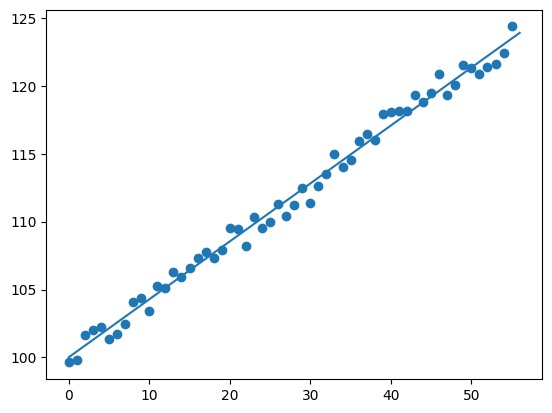

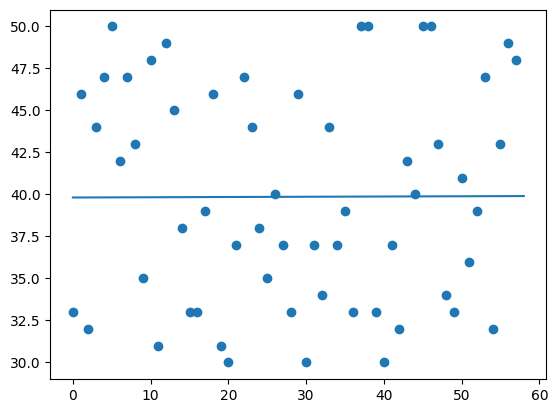

<Figure size 640x480 with 0 Axes>

In [229]:
coeffs_p = get_coeffs(x_price, y_price)
while outlier_count_p > 0:
    x_price, y_price, outlier_count_p = remove_outliers(x_price, y_price, coeffs_p)
    coeffs_p = get_coeffs(x_price, y_price)

coeffs_q = get_coeffs(x_quantity, y_quantity)
while outlier_count_q > 0:
    x_quantity, y_quantity, outlier_count_q = remove_outliers(x_quantity, y_quantity, coeffs_q)
    coeffs_q = get_coeffs(x_quantity, y_quantity)

print_with_approx(x_price, y_price, coeffs_p)
print_with_approx(x_quantity, y_quantity, coeffs_q)